# 1. 라이브러리 및 데이터 불어오기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("/content/drive/MyDrive/G_ML_2/data/wine.csv",sep=',')

In [5]:
data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
data.shape

(1599, 12)

# 2. 단일회귀분석

In [7]:
import statsmodels.api as sm

In [8]:
model = sm.OLS(data['quality'],sm.add_constant(data['alcohol'])).fit()

In [9]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           2.83e-91
Time:                        05:24:01   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

In [10]:
model.params

const      1.874975
alcohol    0.360842
dtype: float64

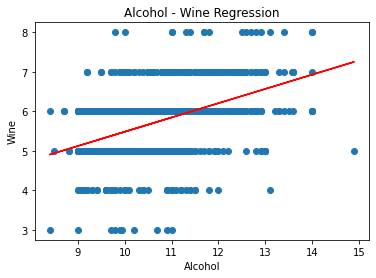

In [11]:
plt.scatter(data['alcohol'], data['quality'],label = 'Actual Data')
plt.plot(data['alcohol'],model.params[0]+model.params[1]*data['alcohol'],
         c ='r',label="Regression fit")
plt.title('Alcohol - Wine Regression')
plt.xlabel('Alcohol')
plt.ylabel('Wine')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
X_train,X_test,y_train,y_test = train_test_split(data['alcohol'], data["quality"], train_size = 0.7,random_state=42)

In [14]:
X_train.head()

925     11.0
363     10.2
906     11.0
426     11.4
1251     9.8
Name: alcohol, dtype: float64

In [15]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[0.37699262]]
lr.intercept_: [1.69472474]


In [19]:
print("훈련 세트 R-square: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 R-square: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 R-square: 0.24
테스트 세트 R-square: 0.19


# 3. 다중회귀분석

In [20]:
X=data[data.columns[0:11]]

In [21]:
y = data[['quality']]

In [22]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=42)

In [24]:
x_train_new = sm.add_constant(X_train)
x_test_new = sm.add_constant(X_test)

In [25]:
x_train_new.head()

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
925,1.0,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,1.0,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,1.0,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,1.0,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,1.0,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8


In [26]:
multi_model = sm.OLS(y_train,x_train_new).fit()
print (multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          8.34e-100
Time:                        05:24:02   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9626 

In [27]:
y_pred = multi_model.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['y_pred']
pred_data = pd.DataFrame(y_pred_df['y_pred'])
y_test_new = pd.DataFrame(y_test)

In [28]:
pred_data['y_test'] = pd.DataFrame(y_test_new['quality'])

In [29]:
pred_data.head()

,y_pred,y_test
803,5.356763,6
124,5.090715,5
350,5.625538,6
682,5.448861,5
1326,5.744784,6


In [30]:
multi_model2 = sm.OLS(y_test,x_test_new).fit()
print (multi_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     25.22
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           5.60e-41
Time:                        05:24:02   Log-Likelihood:                -460.03
No. Observations:                 480   AIC:                             944.1
Df Residuals:                     468   BIC:                             994.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   30.8445 

# 4. scikit-learn을 이용한 회귀분석

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linear1=LinearRegression()

In [33]:
linear1.fit(X_train, y_train)

LinearRegression()

In [34]:
linear1.score(X_train, y_train)

0.3611982441321644

In [35]:
linear1.score(X_test, y_test)

0.35138853325173947

In [36]:
pred_train=linear1.predict(X_train)

In [37]:
pred_test=linear1.predict(X_test)

In [38]:
linear2=LinearRegression(normalize=True)

In [39]:
linear2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [40]:
linear2.score(X_train, y_train)

0.3611982441321645

In [41]:
linear2.score(X_test, y_test)

0.3513885332517398